In [1]:
# Red Wine Quality 
# "와인의 품질이 좋은지 나쁜지 예측할 수 있는 모델을 수립하는 것"
# "종속변수가 2가지 경우의 수인 Binary Classification 연구이므로, ML model 중 Classification Model에 대해 학습을 시킨다."


In [5]:
# 기본 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

wine = pd.read_csv('winequality-red.csv', sep = ';')


### Data load & EDA

In [11]:
# loading data set to a Pandas DataFrame
wine_df = pd.read_csv('winequality-red.csv')

In [13]:
# number of rows & columns in the dataset 
wine_df.shape 

(1599, 12)

In [14]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
# descriptive statistics of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Visualization

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'number of values for each quality')

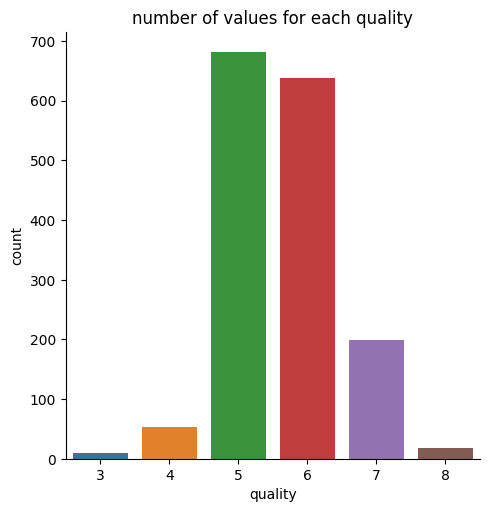

In [19]:
# number of values for each quality 
sns.catplot(x='quality', data=wine_df, kind='count')
plt.title("number of values for each quality")

Text(0.5, 1.0, 'vlatile acidity vs. quality')

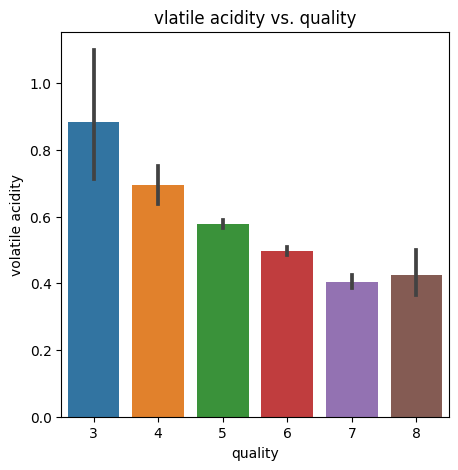

In [22]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine_df)
plt.title("vlatile acidity vs. quality")

Text(0.5, 1.0, 'citric acid vs. quality')

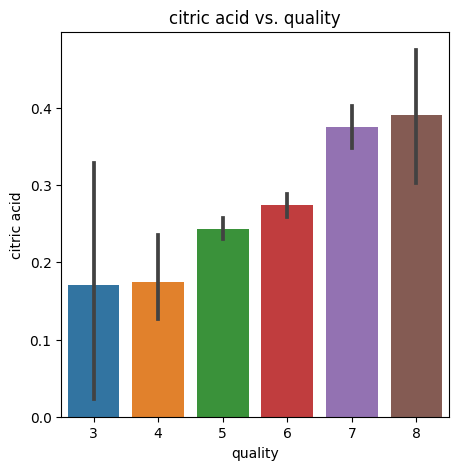

In [23]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = wine_df)
plt.title("citric acid vs. quality")

C:\Users\leedab\AppData\Local\Temp\ipykernel_20224\3117882389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_df['alcohol'], ax = ax[0])
C:\Users\leedab\AppData\Local\Temp\ipykernel_20224\3117882389.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_df['volatile acidity'], ax = ax

<Axes: xlabel='quality', ylabel='alcohol'>

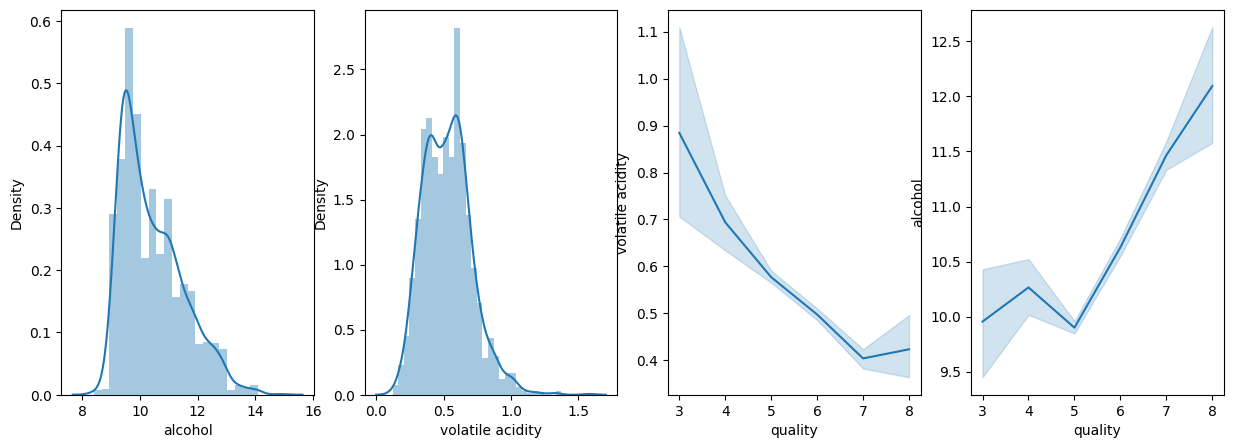

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(15,5))

sns.distplot(wine_df['alcohol'], ax = ax[0])
sns.distplot(wine_df['volatile acidity'], ax = ax[1])
sns.lineplot(x=wine_df['quality'],y=wine_df['volatile acidity'], ax = ax[2])
sns.lineplot(x=wine_df['quality'],y=wine_df['alcohol'], ax = ax[3])

In [24]:
# Correlation between variables
correlation = wine_df.corr()

In [40]:
wine_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<Axes: >

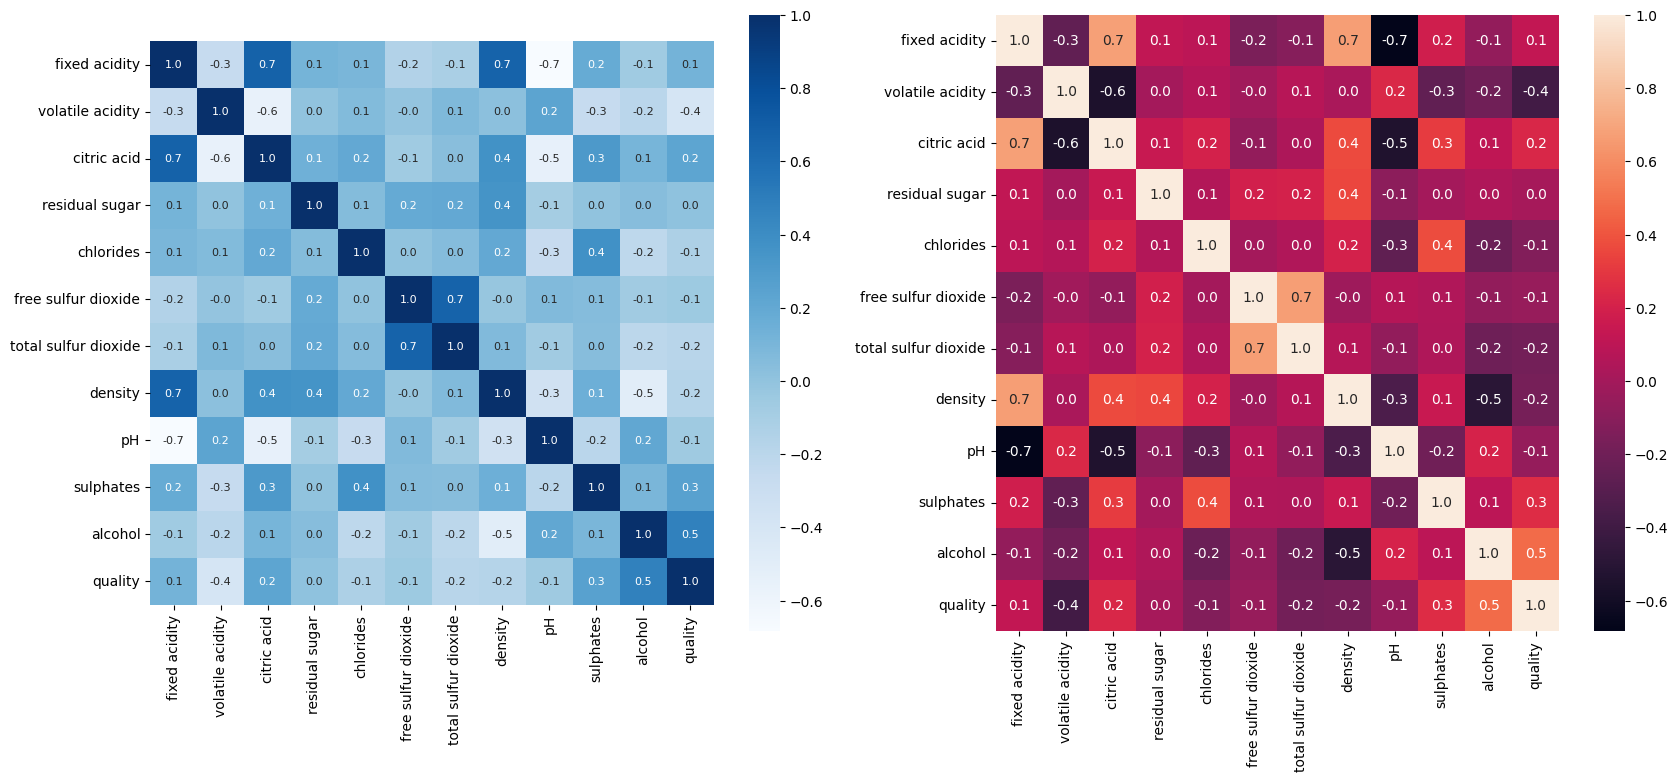

In [57]:
# Deriving a heatmap graph in a different way

fig, ax = plt.subplots(ncols=2, figsize=(20,8))

sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues', ax =ax[0])
sns.heatmap(wine_df.corr(), annot=True, fmt=".1f", ax=ax[1])

### Data Processing

In [59]:
# separate the data and Label
x = wine_df.drop(columns=['quality'], axis = 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [28]:
# As suggested in the dataset description: binarize the label to define and solve classification problem
y = wine_df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [29]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [33]:
# train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1119,) (480,)


#### Build a model for classifying wine quality

In [36]:
# model with default hyperparams, Tune only if it does not perform good.
random_forest = RandomForestClassifier()

In [37]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluate trained model

In [39]:
# accuracy on test data
y_pred = random_forest.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

NameError: name 'accuracy_score' is not defined